## 🏷️ Notebook Overview: Labeling All Images with Bounding Boxes

The purpose of this notebook is to automate the **labeling process** by assigning bounding box annotations to each image in the dataset. It acts as a bridge between raw detection results and the structured dataset required for training and evaluation.

---

### 🎯 Purpose

- **Load and process** raw or previously extracted bounding boxes.
- **Match each bounding box** with its corresponding image.
- **Generate labeled data** in a structured format for downstream tasks such as model training.
- **Optionally visualize** the labels to confirm their correctness.

---

### 🛠️ Main Tasks Performed in This Notebook

1. **Read image files** and associated bounding box data.
2. **Loop through all image-label pairs** to ensure annotations are aligned.
3. **Assign labels** based on image filenames or line numbers.
4. **Prepare the annotations** in the desired output format (e.g., YOLO, COCO, custom JSON).
5. (Optional) **Display samples with drawn bounding boxes** for quality assurance.

---

### 📦 Output

By the end of this notebook:
- Every image has its associated labels.
- The output annotations can be saved in multiple formats (e.g., `.json`, `.txt`).
- This labeled data can now be used to train object detection or OCR models effectively.

---

### ✅ Why This Step Is Important

Proper labeling is crucial to ensure the quality and performance of any computer vision model. This notebook ensures that:
- All data is **consistently and correctly labeled**.
- The dataset is **ready for integration** into machine learning pipelines.
- Misalignments or missing data are caught early through validation steps.


In [ ]:
import os
import matplotlib.pyplot as plt

class LabelingData:
    def __init__(self, image_dir, label_dir, output_dir):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.output_dir = output_dir
        self.image_names = []
        self.image_bounding_boxes = {}
        self.load_data()

    def load_data(self):
        # List all files in the image directory
        image_files = os.listdir(self.image_dir)
        # Extract image names without extensions
        self.image_names = [os.path.splitext(filename)[0] for filename in image_files]
        
        # Iterate through each image to load its bounding boxes
        for image_name in self.image_names:
            label_path = os.path.join(self.label_dir, f"{image_name}.txt")
            if os.path.exists(label_path):
                self.load_bounding_boxes(image_name, label_path)

    def load_bounding_boxes(self, image_name, label_path):
        # Read bounding box coordinates from label file
        with open(label_path, "r") as label_file:
            # Extract and format bounding box coordinates
            bounding_boxes = [(line.split()[0], tuple(map(float, line.strip().split()[1:]))) for line in label_file]
        
        # Associate bounding box coordinates with image filename
        self.image_bounding_boxes[image_name] = bounding_boxes

    def display_image(self, image_name):
        # Load the specified image
        image_path = os.path.join(self.image_dir, f"{image_name}.jpg")
        # Display the image using matplotlib without any colormap
        image = plt.imread(image_path)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(image_name)
        plt.show()

    def select_bounding_boxes_for_image(self, image_name):
        # Get the bounding boxes for the specified image
        bounding_boxes_info = self.image_bounding_boxes[image_name]
        
        for index, (label, bbox) in enumerate(bounding_boxes_info):
            # Extract bounding box coordinates
            x_center_norm, y_center_norm, width_norm, height_norm = bbox
            height, width = plt.imread(os.path.join(self.image_dir, f"{image_name}.jpg")).shape
            x_center = int(x_center_norm * width)
            y_center = int(y_center_norm * height)
            width_pixels = int(width_norm * width)
            height_pixels = int(height_norm * height)
            # Calculate bounding box coordinates
            x1 = max(0, x_center - width_pixels // 2)
            y1 = max(0, y_center - height_pixels // 2)
            x2 = min(width, x_center + width_pixels // 2)
            y2 = min(height, y_center + height_pixels // 2)
            # Extract bounding box region from the original image
            bounding_box_image = plt.imread(os.path.join(self.image_dir, f"{image_name}.jpg"))[y1:y2, x1:x2]
            # Display the bounding box region using matplotlib
            plt.imshow(bounding_box_image, cmap='gray')
            plt.axis('off')
            plt.title(f"Selected Bounding Box ({image_name}, Line {index + 1})")
            plt.show()
            
            yield index + 1

    def input_words(self):
        # Prompt the user to input words inside the bounding box
        return input("Enter the words inside the bounding box: ")

    def save_bounding_box(self, image_name, line_number, words):
        # Get the bounding boxes for the specified image
        bounding_boxes_info = self.image_bounding_boxes[image_name]
        label, bbox = bounding_boxes_info[line_number - 1]
        # Extract bounding box coordinates
        x_center_norm, y_center_norm, width_norm, height_norm = bbox
        height, width = plt.imread(os.path.join(self.image_dir, f"{image_name}.jpg")).shape
        x_center = int(x_center_norm * width)
        y_center = int(y_center_norm * height)
        width_pixels = int(width_norm * width)
        height_pixels = int(height_norm * height)
        # Calculate bounding box coordinates
        x1 = max(0, x_center - width_pixels // 2)
        y1 = max(0, y_center - height_pixels // 2)
        x2 = min(width, x_center + width_pixels // 2)
        y2 = min(height, y_center + height_pixels // 2)
        # Extract bounding box region from the original image
        bounding_box_image = plt.imread(os.path.join(self.image_dir, f"{image_name}.jpg"))[y1:y2, x1:x2]
        # Create output directory if it doesn't exist
        output_folder = os.path.join(self.output_dir, image_name)
        os.makedirs(output_folder, exist_ok=True)
        # Save the bounding box image with inputted words
        output_filename = f"{words}_line{line_number}.jpg"
        plt.imsave(os.path.join(output_folder, output_filename), bounding_box_image, cmap='gray')

# Instantiate the LabelingData class with the directory paths
labeling_data = LabelingData("images\\train", "labels\\train", "extracted_bounding_boxes")




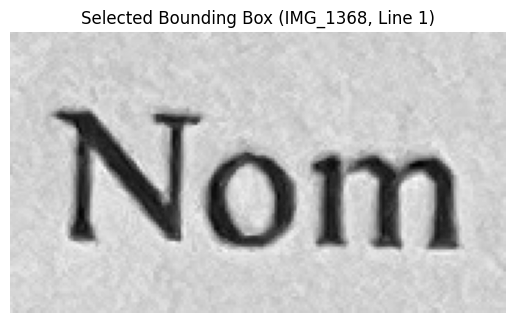

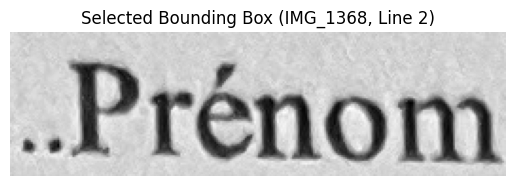

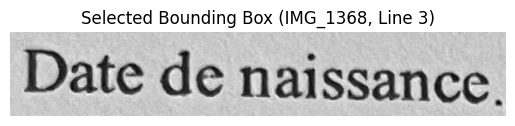

In [3]:
# Test the methods for each image
for image_name in labeling_data.image_names:
    for line_number in labeling_data.select_bounding_boxes_for_image(image_name):
        words = labeling_data.input_words()
        labeling_data.save_bounding_box(image_name, line_number, words)